# Notebook 8: 梯度下降(Gradient Descent) - 动手调参，完成学习

这是我们整个数学基础学习之旅的最后一站，也是最高潮的部分。我们将把之前学到的所有概念——前向传播、损失函数、反向传播——全部整合起来，实现完整的 **梯度下降 (Gradient Descent)** 算法，亲眼见证一个模型是如何通过迭代来“学习”的。

**目标:** 理解梯度下降的工作原理，并动手实现一个完整的训练循环。

**核心直觉:** 摸黑下山。
你站在浓雾弥漫的山上（损失景观），你的目标是到达谷底。
1.  **看方向:** 你用脚感知了一下地面的坡度（计算梯度）。你发现，往东走是上山最快的方向。
2.  **迈一步:** 于是，你朝着完全相反的方向——西面（负梯度方向）——迈出了一小步。
3.  **重复:** 在新的位置上，你再次感知坡度，找到新的下山方向，再迈一小步。

不断重复这个过程，你最终就能走到山谷的最低点。这个过程，就是梯度下降。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. 学习率 (Learning Rate)

在下山的比喻中，你每一步“迈多大”，这个步长就是 **学习率 (Learning Rate)**。它是一个超参数（需要我们手动设置），对训练过程至关重要：
- **学习率太小:** 你每次只挪动一小点，下山会非常慢。
- **学习率太大:** 你可能一步迈得太大，直接跨过了谷底，甚至跑到了对面更高的山坡上，导致无法收敛。

参数更新的规则是：
`新参数 = 旧参数 - 学习率 * 梯度`

## 2. 实例：回到房价预测问题

我们再次使用 Notebook 5 中的简单模型：`价格 = 面积 * w`。
- 真实数据: `area = 100`, `true_price = 300`
- 损失函数: `L = (预测价格 - 真实价格)² = ((area * w) - true_price)²`

我们需要计算损失 `L` 对参数 `w` 的导数 `dL/dw`。
根据链式法则：
`dL/dw = (dL/d(预测价格)) * (d(预测价格)/dw)`
`dL/dw = 2 * (预测价格 - 真实价格) * area`

In [2]:
# 数据
area = 100
true_price = 300

# 计算梯度的函数
def calculate_gradient(w, area, true_price):
    predicted_price = area * w
    # dL/dw = 2 * (predicted_price - true_price) * area
    gradient = 2 * (predicted_price - true_price) * area
    return gradient

## 3. 完整的训练循环

现在，我们来实现梯度下降的完整过程。

In [3]:
# 1. 初始化参数
w = 0.1  # 随机从一个很小的值开始

# 2. 设置超参数
learning_rate = 0.000001 # 学习率需要非常小心地设置
epochs = 20 # 我们要走多少步（训练多少轮）

# 用来记录历史数据以供可视化
w_history = []
loss_history = []

# 3. 训练循环
for i in range(epochs):
    # 记录当前状态
    w_history.append(w)
    predicted_price = area * w
    loss = (predicted_price - true_price) ** 2
    loss_history.append(loss)
    
    # 打印进度
    print(f"Epoch {i+1}: w = {w:.2f}, Loss = {loss:.2f}")
    
    # a. 计算梯度 (看方向)
    gradient = calculate_gradient(w, area, true_price)
    
    # b. 更新参数 (迈一步)
    w = w - learning_rate * gradient


Epoch 1: w = 0.10, Loss = 84100.00
Epoch 2: w = 0.16, Loss = 80769.64
Epoch 3: w = 0.21, Loss = 77571.16
Epoch 4: w = 0.27, Loss = 74499.34
Epoch 5: w = 0.33, Loss = 71549.17
Epoch 6: w = 0.38, Loss = 68715.82
Epoch 7: w = 0.43, Loss = 65994.68
Epoch 8: w = 0.48, Loss = 63381.29
Epoch 9: w = 0.53, Loss = 60871.39
Epoch 10: w = 0.58, Loss = 58460.88
Epoch 11: w = 0.63, Loss = 56145.83
Epoch 12: w = 0.68, Loss = 53922.46
Epoch 13: w = 0.72, Loss = 51787.13
Epoch 14: w = 0.77, Loss = 49736.36
Epoch 15: w = 0.81, Loss = 47766.80
Epoch 16: w = 0.86, Loss = 45875.23
Epoch 17: w = 0.90, Loss = 44058.57
Epoch 18: w = 0.94, Loss = 42313.85
Epoch 19: w = 0.98, Loss = 40638.22
Epoch 20: w = 1.02, Loss = 39028.95


## 4. 可视化学习过程

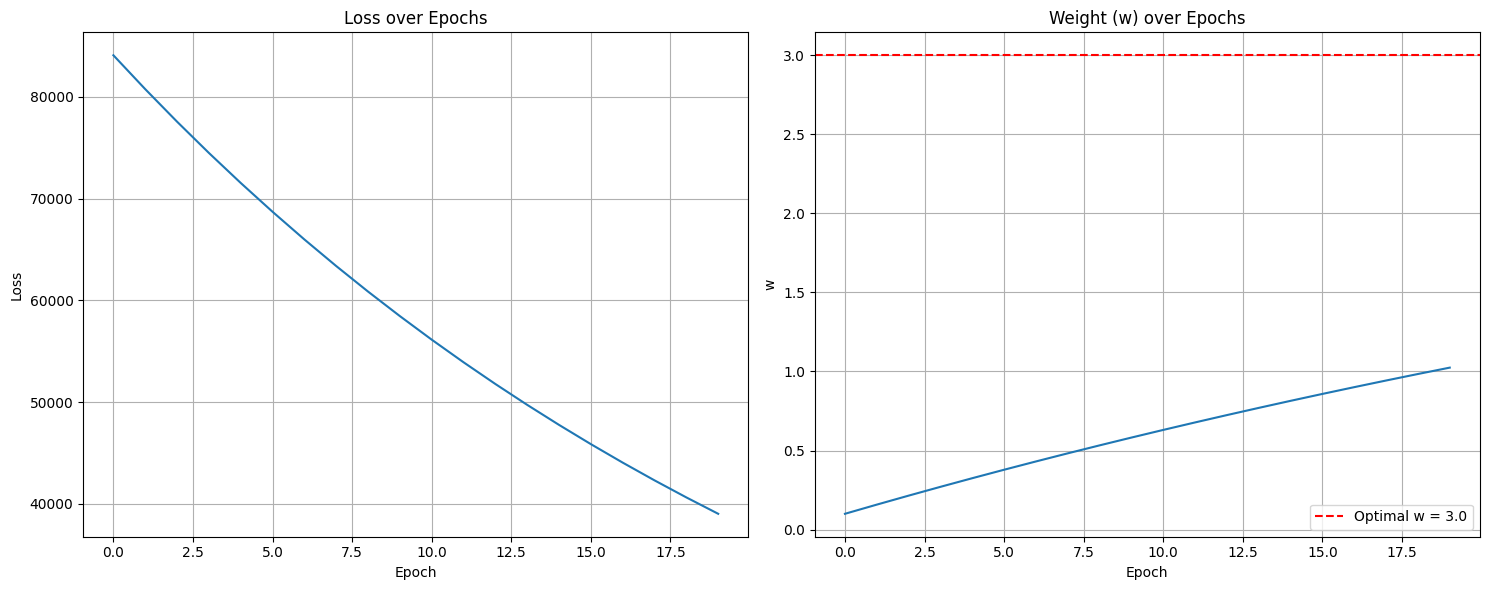

In [4]:
plt.figure(figsize=(15, 6))

# 损失下降曲线
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# 参数w的变化曲线
plt.subplot(1, 2, 2)
plt.plot(w_history)
plt.axhline(3.0, color='r', linestyle='--', label='Optimal w = 3.0')
plt.title('Weight (w) over Epochs')
plt.xlabel('Epoch')
plt.ylabel('w')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

从图中可以清晰地看到：
1.  左图：损失值随着训练的进行在迅速下降。
2.  右图：参数 `w` 的值从初始的 `0.1` 逐步逼近了最优值 `3.0`。

我们的模型真的在“学习”！

## 总结与下一步

**祝贺您！您已经完成了从零开始的神经网络数学基础之旅！**

我们从最基础的向量开始，一步步构建了神经网络的静态结构（前向传播），然后深入探索了其动态学习的过程（反向传播与梯度下降）。现在，您已经对神经网络背后的核心数学原理有了坚实且直观的理解。

您已经完全准备好进入下一个阶段：**用 PyTorch 或 TensorFlow 这样的现代深度学习框架，从头开始实现一个真正的手写数字识别神经网络**。届时您会发现，这些框架已经帮我们自动处理了所有梯度的计算（反向传播），我们只需要定义好网络结构（前向传播）和损失函数，然后调用优化器（梯度下降）即可。但因为您已经理解了这一切是如何运作的，您将能更深刻地使用这些工具，而不仅仅是当一个“调包侠”。